In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"E:\study materials\python\05_Deep Learning - Udemy\FINAL_TF2_FILES\TF_2_Notebooks_and_Data\DATA\RSCCASN.csv",parse_dates=True,index_col='DATE')

In [5]:
df

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [6]:
df.columns = ['sales']

<AxesSubplot:xlabel='DATE'>

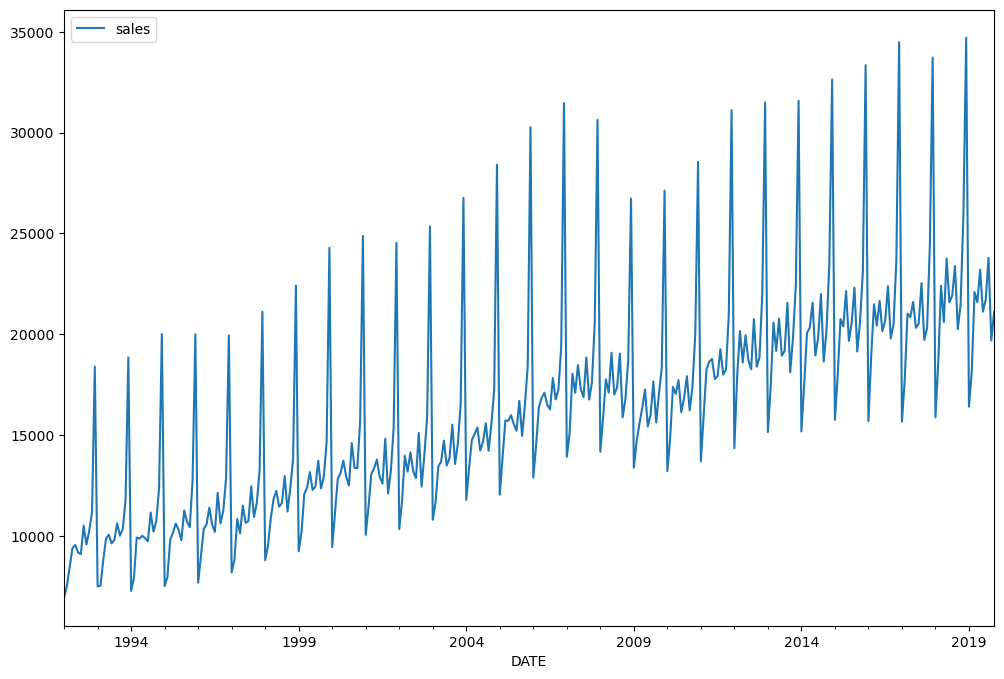

In [7]:
df.plot(figsize=(12,8))

In [8]:
len(df)

334

In [9]:
len(df) - 18

316

In [10]:
test_size = 18

In [11]:
test_ind = len(df) - test_size

In [12]:
train = df.iloc[:test_ind]

In [13]:
test = df.iloc[test_ind:]

In [14]:
train

,sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [15]:
test

,sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(train)

MinMaxScaler()

In [21]:
scaled_train = scaler.transform(train)

In [22]:
scaled_test = scaler.transform(test)

In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
len(test)

18

In [29]:
length = 12

In [30]:
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [31]:
X,y = generator[0]

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [33]:
n_features = 1

model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [37]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [38]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

C:\Users\seeni\AppData\Local\Temp\ipykernel_9636\3786894748.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])


Epoch 1/20
304/304 [==============================] - 8s 11ms/step - loss: 0.0268 - val_loss: 0.0150
Epoch 2/20
304/304 [==============================] - 3s 10ms/step - loss: 0.0174 - val_loss: 0.0060
Epoch 3/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0097 - val_loss: 0.0018
Epoch 4/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0056 - val_loss: 6.7712e-04
Epoch 5/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0030 - val_loss: 5.8193e-04
Epoch 6/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 7/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0032 - val_loss: 4.7910e-04
Epoch 8/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0016 - val_loss: 4.0419e-04
Epoch 9/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0021 - val_loss: 6.4235e-04
Epoch 10/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0

In [39]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

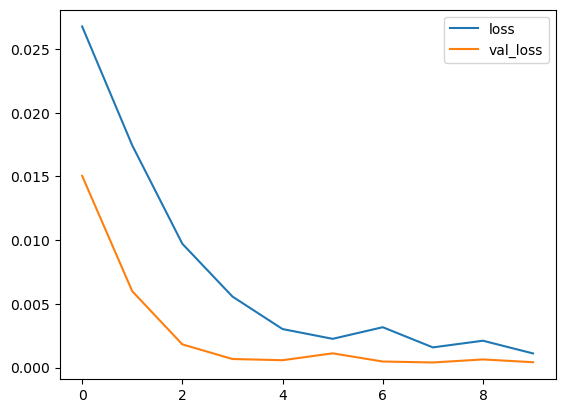

In [40]:
losses.plot()

In [41]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 47ms/step


In [42]:
true_predictions = scaler.inverse_transform(test_predictions)

In [43]:
test['predictions'] = true_predictions

C:\Users\seeni\AppData\Local\Temp\ipykernel_9636\349349345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [44]:
test

,sales,predictions
DATE,,
2018-05-01,23764,21358.614514
2018-06-01,21589,20394.991617
2018-07-01,21919,20603.740172
2018-08-01,23381,22127.047251
2018-09-01,20260,20059.508965
2018-10-01,21473,20638.459908
2018-11-01,25831,24000.635718
2018-12-01,34706,33257.807519
2019-01-01,16410,16670.783590


<AxesSubplot:xlabel='DATE'>

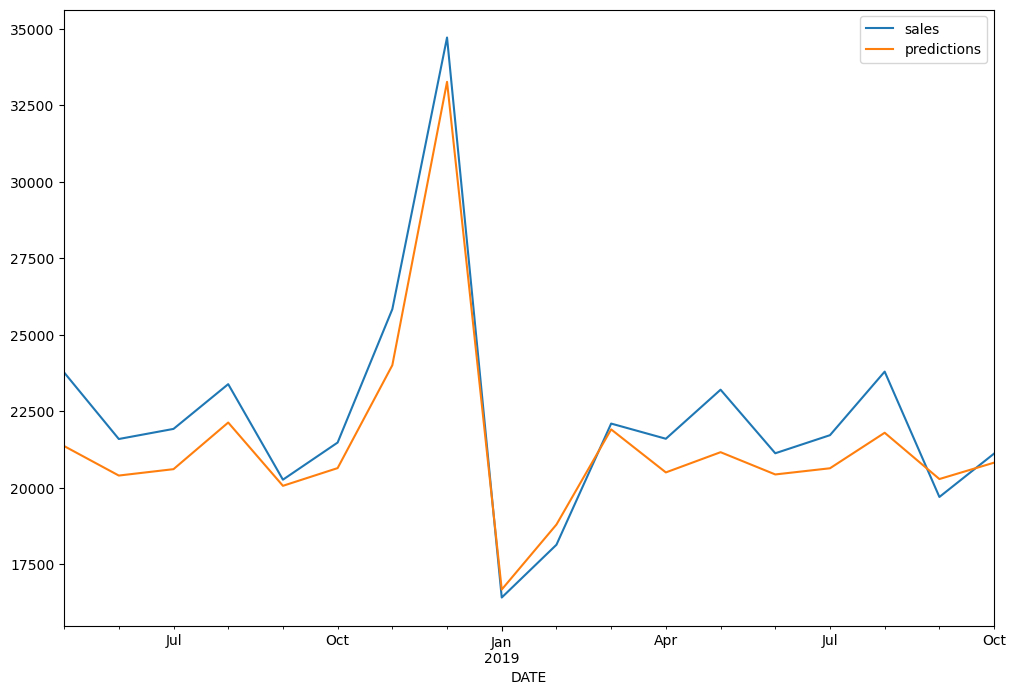

In [45]:
test.plot(figsize=(12,8))

In [46]:
full_scaler = MinMaxScaler()

In [47]:
scaled_full_data = full_scaler.fit_transform(df)

In [48]:
length = 12

In [49]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length = length, batch_size=1)

In [50]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit_generator(generator,epochs=8)

Epoch 1/8


C:\Users\seeni\AppData\Local\Temp\ipykernel_9636\3936953538.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=8)


322/322 [==============================] - 6s 9ms/step - loss: 0.0276
Epoch 2/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0180
Epoch 3/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0128
Epoch 4/8
322/322 [==============================] - 3s 10ms/step - loss: 0.0054
Epoch 5/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0023
Epoch 6/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0022
Epoch 7/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0017
Epoch 8/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0014


In [60]:
forecast = []
periods=12

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    current_pred = model.predict(current_batch)[0]

    forecast.append(current_pred) 

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 39ms/step


In [61]:
forecast = scaler.inverse_transform(forecast)

In [62]:
df

,sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [63]:
forecast

array([[20437.51541328],
       [19594.00215006],
       [19801.28051782],
       [21274.90494776],
       [19246.38696361],
       [19707.93798161],
       [22964.54185724],
       [32156.65273428],
       [15936.96715879],
       [18030.07898903],
       [20904.22070646],
       [19582.88503766]])

In [64]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [65]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [66]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns = ['Forecast'])

<AxesSubplot:xlabel='DATE'>

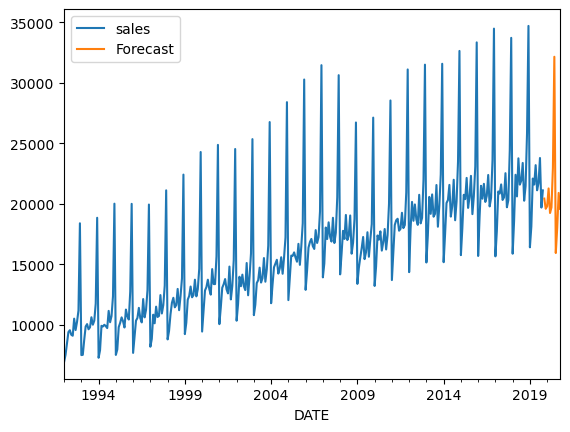

In [67]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576.0, 611.0)

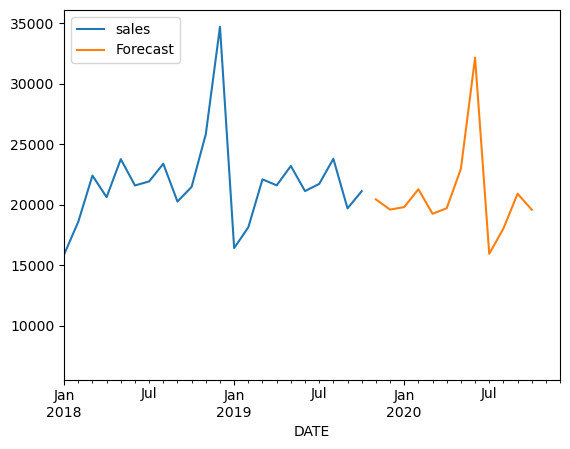

In [68]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')